In [63]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [80]:
#Read train data
df = pd.read_csv("C:\\Users\\Md Moradul Siddique\\Documents\\data\\Titanic data\\train.csv",index_col = 0)


In [10]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [15]:
# converting Sex :female>-1 and male>-0 also Embarked : S>-0, C>-1, Q>-2
j = 1
for i in df.Sex:
    if i == "female":
        df.loc[j,["Sex"]] = 1
    else:
        df.loc[j,["Sex"]] = 0
    j += 1

j = 1
for i in df.Embarked:
    if i == 'S':
        df.loc[j,["Embarked"]] = 0
    elif i == 'C':
        df.loc[j,["Embarked"]] = 1
    else:
        df.loc[j,["Embarked"]] = 2
    j += 1

In [22]:
#fill up (891-714 = 177) NaN value using mean value
df.Age.fillna(df.Age.mean(),inplace = True)

In [23]:

X = df.loc[:,["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y = df.loc[:,["Survived"]]

In [26]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.000000,1,0,7.2500,2
2,1,0,38.000000,1,0,71.2833,2
3,3,0,26.000000,0,0,7.9250,2
4,1,0,35.000000,1,0,53.1000,2
5,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
887,2,0,27.000000,0,0,13.0000,2
888,1,0,19.000000,0,0,30.0000,2
889,3,0,29.699118,1,2,23.4500,2


In [34]:
y

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


In [88]:
#again check info

print(df.Sex.value_counts()) 
print(df.Embarked.value_counts())
print(df.info())

male      266
female    152
Name: Sex, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


Fit the model

In [58]:
s = StandardScaler()
X = s.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [64]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
c = confusion_matrix(y_predict,y_test)

C:\Users\Md Moradul Siddique\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
print(lr.score(X_test,y_test))

0.7374301675977654


or

In [78]:
print("Training Accuracy :",(c[0][0]+c[1][1])/len(X_test)*100)

Training Accuracy : 73.74301675977654


In [76]:
len(X_test)

179

In [77]:
(c[0][0],c[1][1])

(97, 35)

Test the model

In [83]:
#Read test data
test = pd.read_csv("C:\\Users\\Md Moradul Siddique\\Documents\\data\\Titanic data\\test.csv",index_col = 0)

In [84]:
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [86]:
# from PassengerId 892
j = 892
for i in test.Sex:
    if i == "female":
        test.loc[j,["Sex"]] = 1
    else:
        test.loc[j,["Sex"]] = 0
    j += 1
test.Fare.fillna(test.Fare.mean(),inplace = True)
test.Age.fillna(test.Age.mean(),inplace = True)
j = 892
for i in test.Embarked:
    if i == 'S':
        test.loc[j,["Embarked"]] = 0
    elif i == 'C':
        test.loc[j,["Embarked"]] = 1
    else:
        test.loc[j,["Embarked"]] = 2
    j+=1
print(test.Sex.value_counts()) 
print(test.Embarked.value_counts())
print(test.info())

0    266
1    152
Name: Sex, dtype: int64
0    270
1    102
2     46
Name: Embarked, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 55.9+ KB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 46.1+ KB
None
(418,)
             Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 0


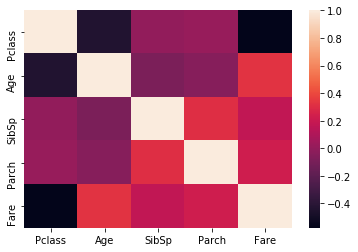

In [93]:
#drop for test
X_testset = test.loc[:,["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
print(X_testset.info())

sns.heatmap(X_testset.corr())

X_testset = s.fit_transform(X_testset)
y_pred = lr.predict(X_testset)

print(y_pred.shape)  #418

#create a dataframe
dic = {}
dic['PassengerId'] = test.index
dic['Survived'] = y_pred

df = pd.DataFrame(dic)
df.set_index("PassengerId",inplace = True)
print(df.head())
df.to_csv('C:\\Users\\Md Moradul Siddique\\Documents\\data\\Titanic data\\submission.csv')